## Теоретический материал — Эволюционные методы

Деревья решений являются одним из наиболее эффективных эволюционных методов.

Эволюционные методы относятся к числу эффективных средств решения задач оптимизации и структурного синтеза проектных решений. Они основаны на использовании принципов оптимального приспособления организмов в живой природе к условиям окружающей среды. К числу эволюционных относятся методы генетические, колонии муравьев, поведения толпы. Наиболее развиты и востребованы в настоящее время генетические алгоритмы. По мере развития техники и технологий растет доля сложных задач проектирования и управления, для решения которых применение традиционных методов проблематично. Поэтому все большее внимание уделяется применению методов искусственного интеллекта.

### Генетические алгоритмы. Для применения ГА необходимо:

1. **Выделить совокупность свойств объекта**, характеризуемых внутренними параметрами и влияющих на его полезность, т.е. выделить множество управляемых параметров `X = (x₁, x₂, ..., xₙ)`, среди `xᵢ` могут быть величины различных типов (`real`, `integer`, `Boolean`, `enumeration`). Наличие нечисловых величин (enumeration) обуславливает возможность решения задач не только параметрической, но и структурной оптимизации;

2. **Сформулировать количественную оценку полезности вариантов объекта** — функцию полезности `F`. Если в исходном виде задача многокритериальна, то такая формулировка означает выбор скалярного (обобщённого) критерия;

3. **Представить вектор X в форме хромосомы** — записи следующего вида:
```text
┌─────┬─────┬─────┬─────┬─────┐
│ X₁ │ X₂ │ X₃ │ ... │ Xₙ │
└─────┴─────┴─────┴─────┴─────┘
```
### Этапы генетического алгоритма могут быть представлены в следующем виде:
```c
for (k=0; k<G; k++) {
    for (j=0; j<N; j++) {
        // Выбор родительской пары хромосом;
        // Кроссовер;
        // Мутации;
        // Оценка функции полезности F потомков;
        // Селекция;
    }
    // Замена текущего поколения новым;
}

## 1.1.1 Пример

### Задача:

Пусть дана начальная популяция из четырёх хромосом с двумя генами `x` и `y`. Качество хромосомы оценивается функцией `Z`. При равном качестве хромосоме предпочтение отдаётся хромосоме с большим номером. На каждом этапе хромосома `a` с высшим качеством порождает четыре новых хромосомы `b₁, c₁, b₂, c₂`, обмениваясь генами с двумя хромосомами `b` и `c` с более низким качеством по указанной схеме.

Последняя хромосома `c` (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосом в популяции и общее качество популяции после четырёх этапов эволюции.


### Решение:

Потребуется несколько функций для реализации алгоритма. Напишем их.

#### Начнём с функции оценки качества хромосомы `qZ(x, y)`:

```python
# функция качества хромосомы
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)
```
Далее, оценим суммарное качество хромосом:
```PYTHON
# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)
```
И запрограммируем представленную выше схему обмена хромосомами:
```PYTHON
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X, Y
```
Напишем функцию для шага эволюции:
```python
# шаг эволюции
def evoStep(X, Y, Z):
    minId = min((value, id) for id, value in enumerate(Z))[1]
    
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z
```
Произведем эволюционные изменения, в соответствии с задачей — 4 шага:
(Далее следует цикл из 4 итераций, где на каждом шаге:

 - выбирается хромосома с наилучшим качеством (по qZ),
 - производится обмен генами по схеме exchangeScheme,
 - удаляется хромосома с наихудшим качеством,
 - обновляются популяции X, Y, Z)
```python
# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepnum=4):
    results = []
    for i in range(stepnum):
        arrZ = [qZ(x, y[1]) for x, y in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])
    return X, Y, results
```
Теперь, когда мы подготовились к решению задачи, написав все необходимые функции для реализации генетического алгоритма (оценки качества хромосом, сортировки потомков и эволюционных шагов), решим задачу в числах.

Пусть даны следующие массивы хромосом `X` и `Y`:
```python
# объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

# Результаты алгоритма
results = evoSteps(X, Y)
```
Теперь выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции. Для этого воспользуемся циклом по значениям переменной `results`.
```python
for i in range(len(results[2])):
    print(f'Итерация {i+1}: max_quality = {max(results[2][i][3])}, total_quality = {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')
```
### Ответ:
```text
max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0

### Задание:

Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.


### Варианты:

Каждый вариант содержит:
- Начальную популяцию из 4 хромосом (обозначены как `a`, `b`, `c` — родители; `b₁, c₁, b₂, c₂` — потомки),
- Таблицу значений генов `x` и `y` для каждой хромосомы,
- Функцию качества `Z = f(x, y)`.


#### **Вариант 7**
- `x`: `[-5, -3, -2, 0]`
- `y`: `[-1, -2, -1, 0]`
- `Z = (x + 3y - 3) / (3x² + y² + 1)`

### Решение:

In [2]:
#1.1.1(Вариант 7)

def qZ(x,y):
    return (x+3*y-3)/(3*x**2+y**2+1)


def qSumZ(Z):
    return sum(Z)


def exchangeScheme(oldX,oldY, sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X,Y


def sorting(Z):
    sortedId=sorted(range(len(Z)), key=lambda k:Z[k])

    return sortedId

def evostep(X,Y,Z):
    _, minId = min((value,id) for (id,value) in enumerate(Z))

    X=X[:]
    Y=Y[:]
    Z=Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X,Y,Z

def evosteps(X,Y, stepsnum=4):
    results=[]

    for i in range(4):
        arrZ=[qZ(x,Y[i]) for i, x in enumerate(X)]
        X,Y,Z=evostep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))

        results.append([X,Y,qSumZ(arrZ),arrZ])

    return X,Y,results

X=[-5,-3,-2,0]
Y=[-1,-2,0,1]

results=evosteps(X,Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]

print(f'max Z:       {max(qualityArrZ)}')


max_1_step: -0.9024725274725275
max_2_step: -4.968383340797134
max_3_step: -0.3433833407971339
max_4_step: -0.1683833407971339
max Z:       0.0


## 1.2. Теоретический материал — Метод имитации отжига

Алгоритм отжига — это метод оптимизации, который называется отжигом, или симуляцией восстановления (*Simulated annealing*). Как ясно из названия, метод поиска моделирует процесс восстановления.

Восстановление — это физический процесс, который заключается в нагреве и последующем контролируемом охлаждении субстанции. В результате получается прочная кристаллическая структура, которая отличается от структуры с дефектами, образующейся при быстром беспорядочном охлаждении. Структура здесь представляет собой кодированное решение, а температура используется для того, чтобы указать, как и когда будут приниматься новые решения.

### Алгоритм имитации отжига включает следующие этапы:

```mermaid
graph TD
    A[Создание начального решения] --> B[Оценка решения]
    B --> C[Изменение решения случайным образом]
    C --> D[Оценка нового решения]
    D --> E{Критерий допуска}
    E -- Да --> F[Рабочее решение]
    E -- Нет --> G[Уменьшение температуры]
    G --> H{Температура > 0?}
    H -- Да --> C
    H -- Нет --> I[Лучшее решение]
    F --> J[Текущее решение]
    J --> E
```
**Метод отжига может быть эффективным при решении задач различных классов, требующих оптимизации. Ниже приводится их краткий список:**
- Создание пути;
- Реконструкция изображения;
- Назначение задач и планирование;
- Размещение сети;
- Глобальная маршрутизация;
- Обнаружение и распознавание визуальных объектов;
- Разработка специальных цифровых фильтров.
- 
Поскольку метод отжига представляет собой процесс генерации случайных чисел, поиск решения с использованием данного алгоритма может занять значительное время. В некоторых случаях алгоритм вообще не находит решение или выбирает не самое оптимальное. Алгоритм отжига как способ выполнения процедур поиска и оптимизации. Данный метод является аналогом процесса нагревания тела до состояния плавления с последующим постепенным охлаждением.

При высоких температурах поиск ведется по всему диапазону. При снижении температуры диапазон поиска уменьшается до небольшой области вокруг текущего решения.


Рассмотрим решение задачи поиска оптимального маршрута на графе методом имитации отжига. Для этого представим формально постановку задачи и рассмотрим пример, который иллюстрирует алгоритм решения.

Итак, необходимо найти длину гамильтонова цикла \( S_k \) в полном графе \( K_6 \) после четырех циклов решения задачи методом отжига. Даны расстояния \( L_{i,j} \) между вершинами. Также даны: начальная последовательность вершин \( L_0 \), последовательность замен вершин \( Z \) и выпавшие при этом вероятности перехода \( P_k, k = 1, dots, 4 \).

Переход на худшее (\( Delta S_k = S_k - S_{k-1} > 0 \)) решение допустим, если \( P_k = 100 \). Снижение температуры происходит по закону \( T_{k+1} = 0.5 T_k \) от \( T_1 = 100 \).

## 1.2.1 Пример

### Задача:

Итак, начальные условия задачи представляют собой следующий граф с расстояниями между рёбрами:

![Граф с 6 вершинами](https://via.placeholder.com/300x250?text=Graph+K6)

| Ребро | \( L_{i,j} \) |
|-------|---------------|
| 1–2   | 20            |
| 1–3   | 40            |
| 1–4   | 42            |
| 1–5   | 33            |
| 1–6   | 21            |
| 2–3   | 26            |
| 2–4   | 38            |
| 2–5   | 42            |
| 2–6   | 17            |
| 3–4   | 22            |
| 3–5   | 43            |
| 3–6   | 21            |
| 4–5   | 27            |
| 4–6   | 22            |
| 5–6   | 26            |


**Начальный маршрут (последовательность вершин):**

V = [1, 4, 5, 2, 6, 3, 1]

**Последовательность замен (перестановок вершин):**

Z = [V₃ ↔ V₄, V₄ ↔ V₆, V₅ ↔ V₂, V₆ ↔ V₂]

**Вероятности перехода на каждом шаге:**

P = [49, 54, 43, 54]

## Решение:

Рассмотрим решение с применением Python.

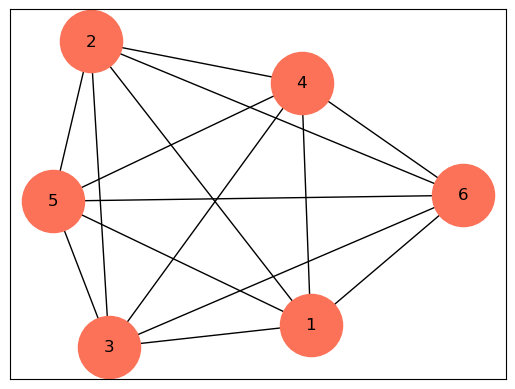

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from math import e

distances = [(1, 2, 20),
             (1, 3, 40),
             (1, 4, 42),
             (1, 5, 33),
             (1, 6, 21),
             (2, 3, 26),
             (2, 4, 38),
             (2, 5, 42),
             (2, 6, 17),
             (3, 4, 22),
             (3, 5, 43),
             (3, 6, 21),
             (4, 5, 27),
             (4, 6, 22),
             (5, 6, 26)]

V = [1, 4, 5, 2, 6, 3, 1]  # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)]              # последовательность замен вершин
P = [49, 54, 43, 54]      # случайные числа, выпавшие в процессе счёта
T = 100                  # начальная температура
# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

# функция изменения температуры
def reduceTemp(prevT):
    nextT = 0.5 * prevT
    return nextT
    
graph = nx.Graph()  # создание пустого графа
graph.add_weighted_edges_from(distances)  # добавление рёбер

# отрисовка графа с заданными вершинами
nx.draw_networkx(graph, node_color='#fb7258', node_size=2000, with_labels=True)

Теперь, напишем необходимые, согласно алгоритму выше, функции для
работы метода имитации отжига. Вычислим длину ребра:

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


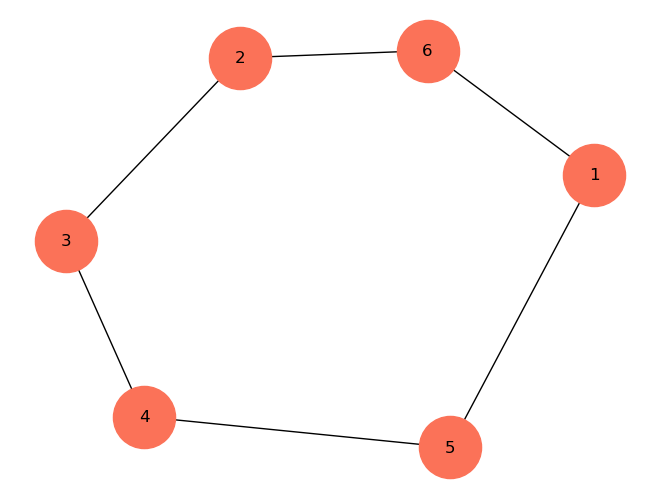

In [11]:
def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

## Задание

Найти длину гамильтонова цикла \( S_4 \) в полном графе \( K_6 \) после четырёх циклов решения задачи методом отжига по варианту ниже.



### Вариант 7 

**Таблица расстояний рёбер \( L_{i,j} \):**

| Ребро | \( L_{i,j} \) |
|-------|---------------|
| 1–2   | 24            |
| 1–3   | 41            |
| 1–4   | 36            |
| 1–5   | 22            |
| 1–6   | 19            |
| 2–3   | 21            |
| 2–4   | 33            |
| 2–5   | 14            |
| 2–6   | 14            |
| 3–4   | 27            |
| 3–5   | 39            |
| 3–6   | 23            |
| 4–5   | 23            |
| 4–6   | 20            |
| 5–6   | 19            |


**Начальный маршрут:**


V = [1, 3, 4, 5, 6, 2, 1]


**Последовательность перестановок вершин:**


Z = [V₅ ↔ V₄, V₄ ↔ V₆, V₅ ↔ V₂, V₆ ↔ V₂]


**Случайные числа (вероятности принятия худшего решения):**

P = [33, 82, 51, 76]


 **Цель:** Реализовать алгоритм имитации отжига, выполнить 4 шага, вычислить длину маршрута после каждого шага и определить \( S_4 \) — длину лучшего найденного маршрута после 4 циклов.
### Решение:

Лучший выбранный маршрут: [1, 6, 5, 4, 3, 2, 1]
Длина лучшего выбранного маршрута: 130
Длины всех рассмотренных маршрутов: [145, 158, 183, 130, 146]


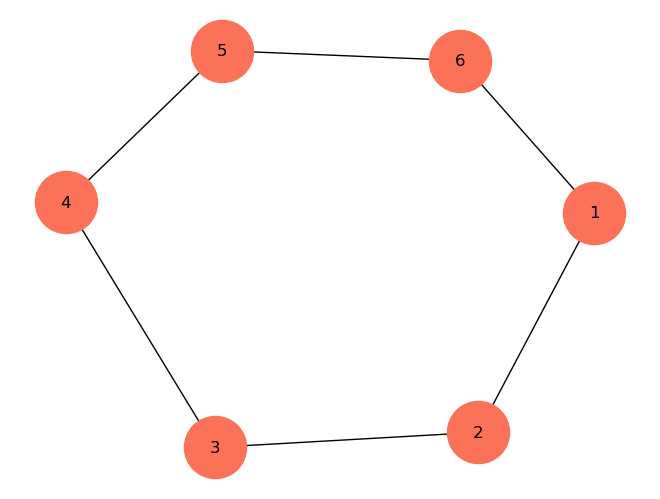

In [12]:
#1.2.1(Вариант 7)
import matplotlib.pyplot as plt
import networkx as nx
from math import e

distances = [(1, 2, 24),
             (1, 3, 41),
             (1, 4, 36),
             (1, 5, 22),
             (1, 6, 19),
             (2, 3, 21),
             (2, 4, 33),
             (2, 5, 33),
             (2, 6, 14),
             (3, 4, 27),
             (3, 5, 39),
             (3, 6, 23),
             (4, 5, 20),
             (4, 6, 20),
             (5, 6, 19)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)]
P = [33, 82, 51, 76]

T=100

def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)


## Задание*:
На решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.
### Решение:

Тестируем метод отжига на 10 разных начальных маршрутах...

Тест  1: S₀ =  142.0 → S* =  167.0 (улучшение:  -25.0)
Тест  2: S₀ =  156.0 → S* =  123.0 (улучшение:  +33.0)
Тест  3: S₀ =  130.0 → S* =  153.0 (улучшение:  -23.0)
Тест  4: S₀ =  172.0 → S* =  123.0 (улучшение:  +49.0)
Тест  5: S₀ =  143.0 → S* =  158.0 (улучшение:  -15.0)
Тест  6: S₀ =  182.0 → S* =  155.0 (улучшение:  +27.0)
Тест  7: S₀ =  156.0 → S* =  133.0 (улучшение:  +23.0)
Тест  8: S₀ =  154.0 → S* =  156.0 (улучшение:   -2.0)
Тест  9: S₀ =  161.0 → S* =  143.0 (улучшение:  +18.0)
Тест 10: S₀ =  152.0 → S* =  161.0 (улучшение:   -9.0)

АНАЛИЗ РЕЗУЛЬТАТОВ:
Лучший найденный маршрут: S = 123.0
Худший найденный маршрут: S = 167.0
Среднее значение S:        147.2
Разброс (max - min):       44.0
Количество запусков с оптимальным результатом: 2/10


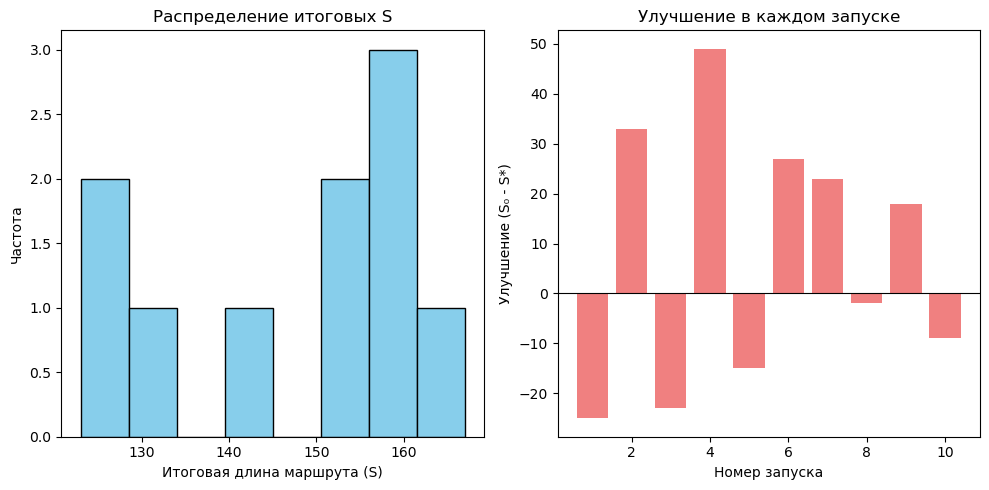

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
from math import e
import random

distances = [
    (1, 2, 24), (1, 3, 41), (1, 4, 36), (1, 5, 22), (1, 6, 19),
    (2, 3, 21), (2, 4, 33), (2, 5, 33), (2, 6, 14),
    (3, 4, 27), (3, 5, 39), (3, 6, 23),
    (4, 5, 20), (4, 6, 20),
    (5, 6, 19)
]

Z = [(3, 4), (4, 6), (5, 2), (6, 2)]
T0 = 100
random.seed(42) 
P = [random.randint(0, 100) for _ in range(len(Z))]


def edgeLength(i, j, distances, roundTrip=True):
    for a, b, w in distances:
        if (a == i and b == j) or (roundTrip and a == j and b == i):
            return w
    raise ValueError(f"Ребро между {i} и {j} не найдено!")

def routeLength(V, distances):
    return sum(edgeLength(V[i], V[i+1], distances) for i in range(len(V)-1))

def routeOneReplacement(arrV, Z_pair):
    arr = arrV.copy()
    i, j = Z_pair
    arr[i-1], arr[j-1] = arr[j-1], arr[i-1] 
    return arr

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(T):
    return 0.5 * T

def chooseRoute(distances, V, Z, T0, P):
    current_route = V.copy()
    current_S = routeLength(current_route, distances)
    T = T0

    for i in range(len(Z)):
        new_route = routeOneReplacement(current_route, Z[i])
        new_S = routeLength(new_route, distances)
        delta = new_S - current_S

        if delta <= 0 or probability(delta, T) > P[i]:
            current_route, current_S = new_route, new_S

        T = reductTemp(T)

    return current_route, current_S


def generate_random_route(n=6):
    """Генерирует случайный замкнутый маршрут по n вершинам."""
    nodes = list(range(1, n+1))
    random.shuffle(nodes)
    return nodes + [nodes[0]]

num_tests = 10
initial_routes = []
results = []

print(f"Тестируем метод отжига на {num_tests} разных начальных маршрутах...\n")

for i in range(num_tests):
    V0 = generate_random_route()
    S0 = routeLength(V0, distances)
    best_route, best_S = chooseRoute(distances, V0, Z, T0, P)
    
    improvement = S0 - best_S
    initial_routes.append(V0)
    results.append({
        'start_route': V0,
        'start_S': S0,
        'best_route': best_route,
        'best_S': best_S,
        'improvement': improvement
    })
    
    print(f"Тест {i+1:2d}: S₀ = {S0:6.1f} → S* = {best_S:6.1f} (улучшение: {improvement:+6.1f})")

print("\n" + "="*70)
print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("="*70)

all_final_S = [r['best_S'] for r in results]
best_overall = min(all_final_S)
worst_overall = max(all_final_S)
avg_final_S = sum(all_final_S) / len(all_final_S)

print(f"Лучший найденный маршрут: S = {best_overall:.1f}")
print(f"Худший найденный маршрут: S = {worst_overall:.1f}")
print(f"Среднее значение S:        {avg_final_S:.1f}")
print(f"Разброс (max - min):       {worst_overall - best_overall:.1f}")

# Найдём, сколько раз мы достигли лучшего результата
count_best = sum(1 for s in all_final_S if s == best_overall)
print(f"Количество запусков с оптимальным результатом: {count_best}/{num_tests}")

# Визуализация распределения итоговых S
plt.figure(figsize=(10, 5))

# Гистограмма итоговых значений S
plt.subplot(1, 2, 1)
plt.hist(all_final_S, bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Итоговая длина маршрута (S)')
plt.ylabel('Частота')
plt.title('Распределение итоговых S')

# График улучшения для каждого запуска
improvements = [r['improvement'] for r in results]
plt.subplot(1, 2, 2)
plt.bar(range(1, num_tests+1), improvements, color='lightcoral')
plt.xlabel('Номер запуска')
plt.ylabel('Улучшение (S₀ - S*)')
plt.title('Улучшение в каждом запуске')
plt.axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()